#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
import urllib.request, shutil
with urllib.request.urlopen("https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py") as response, open("module_update.py", 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

#### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css

Updated file nbtext.py


In [3]:
css()

# Dewey og Bayes

Her har du selve notebooken som henter ut navn og lager graf.

### Start med å importere modulene

In [4]:
update('graph_networkx_louvain')
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph

Updated file graph_networkx_louvain.py


## Bygg korpus og analysér

Hent URN-er fra tekst eller metadata

In [11]:
bøker = nb.get_urn({'title':"%fengselslov%", 'year':1950, 'next':60, 'limit':50})
bøker

[[2013081406090, '', 'Ny fengselslov', 1988],
 [2014051208031,
  '',
  'Lov av 12. desember 1958 nr 7 om fengselsvesenet (fengselsloven)',
  1993],
 [2011020808035, 'Curtis, Yvonne', 'Fengselsloven § 12', 1997],
 [2009092900032,
  '',
  'Lov av 12. desember 1958 nr. 7 om fengselsvesenet (fengselsloven)',
  1992]]

In [28]:
korpus = nb.Corpus(title="%fengsel%", period=(1950, 2010))

In [29]:
korpus.target_urn

[2014040405025,
 2013041807201,
 2009031000013,
 2007052401076,
 2014070107067,
 2016062108063,
 2011110805023,
 2015060808137,
 2013081406090,
 2008061704104,
 2007071900029,
 2011081508079,
 2013061106064,
 2013060306002,
 2007070601005,
 2007042501063,
 2011030908072,
 2014060308093,
 2013110406019,
 2013041805041,
 2014120308195,
 2016062908004,
 2011011306066,
 2007022201012,
 2011110708164,
 2008091504137,
 2013040208031,
 2007070501030,
 2015060508097,
 2013041505032,
 2007060100004,
 2015072308059,
 2012060605040,
 2007072400024,
 2015042008171,
 2010042708046,
 2007121204034,
 2011022205097,
 2007072501074,
 2013012907076,
 2008051904052,
 2007073001091,
 2013060506011,
 2014020408058,
 2013061006024,
 2011070605078,
 2007070204008,
 2007031501035,
 2008081200010,
 2013040305118,
 2011071306108,
 2010042608149,
 2011052708041,
 2016083008026]

In [30]:
korpus.difference(doc_exp=1.1, freq_exp=1.1)

In [31]:
grafer = dict()
missed = []
for u in korpus.target_urn:
    try:
        grafer[u] = nb.make_network_graph(u,list(korpus.difference(doc_exp=1.1, freq_exp=1.1, aslist = False).index)[:200]) 
    except:
        missed.append(nb.metadata(u))

In [32]:
print(len(grafer), len(missed))

54 0


## Analyse

Hent ut mulige navn fra boken

In [33]:
graf = nx.compose_all([grafer[u] for u in grafer])

Clustring slik fargene viser

In [34]:
gnl.show_community(graf)

1 Bredtveit, betjenten, fangens, avdeling, barndom, betjent, fengselsledelsen, Fengselet, Fangene, fengselet, fangen, rehabilitering, Fangen, betjentene, lidelse, anstalten, fange, fangene, frigang, arabisk, samtaler, fengselsvesenets, fanger, cellen, rundskriv, betjenter, Wilde, avdelingen, reglement, reglementet, fangenes

2 direktøren, Reitgjerdet, celler, vokter, anstaltene, Schirmer, arkitekt, Justisdepartementet, arkitektoniske, kretsfengsel, Ila, voktere, note, vokterne, fengselsvesenet, fengselsloven, sinnssyke, Botsfengslet, murene, ordinære, anstalt, fengslets, Botsfengselet, permisjon, asyl, OSLO, Riksantikvaren, avd., Fengselsstyret, fengselsdistrikt, sonet, Ullersmo, kriminelle, sikring, dom, idømt, landsfengsel, hjelpefengsel, uniform, straffeloven, soningen, lukkede, tjenesten, Kriminalasylet, Hess, sykehus, sikringsanstalt, Opstad

3 situasjonsprega, Skaalvik, fullført, utdanningsønske, Undersøkinga, påverka, fengsel, Innsette, soning, miljøarbeid, Fylkesmannen, KRUS, k

Se litt på hva statistikken viser

In [35]:
dict(nb.central_betweenness_characters(graf, n=10))

{'fengsel': 0.04822607951174821,
 'fengslet': 0.039691756232012126,
 'politiet': 0.020749371317669726,
 'dom': 0.020531458546460636,
 'fengsler': 0.016611938102975975,
 'straff': 0.01603822674338589,
 'varetekt': 0.015768227643945688,
 'innsatte': 0.015526291377783153,
 'soning': 0.013851985208541112,
 'kriminalitet': 0.012953178793440087}

In [36]:
dict(nb.central_characters(graf, n=10))

{'fengsel': 0.9547738693467337,
 'fengslet': 0.9195979899497487,
 'innsatte': 0.8140703517587939,
 'straff': 0.8140703517587939,
 'fengsler': 0.8090452261306533,
 'dom': 0.7889447236180904,
 'fanger': 0.7839195979899498,
 'fengslene': 0.7688442211055276,
 'fangene': 0.7638190954773869,
 'fange': 0.7236180904522613}

Lager en subgraf basert på vekting av buene i grafen

In [37]:
subedge = [(edge[0], edge[1]) for edge in graf.edges(data=True) if edge[2]['weight'] > 10]

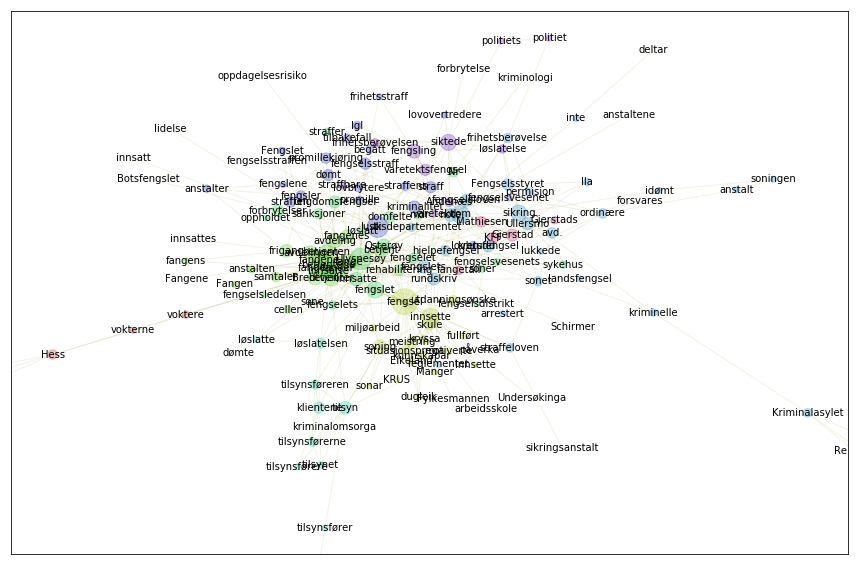

In [38]:
gnl.show_graph(graf.edge_subgraph(subedge))

In [39]:
from graph_networkx_louvain import make_cliques_from_graph
import networkx as nx
from collections import Counter
def show_cliques(G):
    C = make_cliques_from_graph(G.to_undirected())
    for t in C[1]:
        print(t, ', '.join(list(dict(Counter(nx.degree_centrality(G.subgraph(C[1][t]))).most_common()).keys())))
        print()

In [40]:
show_cliques(graf.edge_subgraph(subedge))

(3, 1) fanger, Ulvsnesøy, betjentene, fangene, fengsel, fangen, tk, betjenter, betjenten, betjent, sikring, dom, Bredtveit, avdeling, fange, fengslet, avdelingen, note, innsatte, siktede, Osterøy, Innsatte, fangenes, fengsling, fengslets, klientene, kretsfengsel, fengselsloven, tilsyn, ungdomsfengsel, Ullersmo, frigang, Gjerstad, rehabilitering, Fengselsstyret, rundskriv, KFF, varetektsfengsel, sanksjoner, forbrytelser, løslatelsen, fengselet, straff, avd., samtaler, tilsynsføreren, hjelpefengsel, Mathiesen, fengselets, løslatelse, fangetall, Justisdepartementet, tilsynsførerne, frihetsberøvelse, frihetsberøvelsen, løslatt, sonet, Andenæs, straffen, Ila, Gjerstads, permisjon, tilsynet, straffbare, anstalten, cellen, soner, fangens, soning, varetekt, Fangen, tilsynsførere, sone

(3, 2) lgl, fengsling, straffer

(3, 3) innsette, fengsel, soning, meistring, kunnskapar, situasjonsprega, utdanningsønske, skule, Eikeland, kryssa, motiverte, dugleik, Innsette, fullført, Manger, dom

(3, 4) kr

In [41]:
nb.central_betweenness_characters(graf.edge_subgraph(subedge))

[('fengsel', 0.2508202715222583),
 ('tk', 0.154976171292629),
 ('Ulvsnesøy', 0.12263823553074442),
 ('fanger', 0.11781838491951038),
 ('sikring', 0.09158237785705235),
 ('dom', 0.09036408753758125),
 ('innsette', 0.06569391445447134),
 ('fengslet', 0.06168450755512081),
 ('tilsyn', 0.055825291502899825),
 ('siktede', 0.050156155248113427)]

In [42]:
nb.central_characters(graf.edge_subgraph(subedge))

[('fengsel', 0.22424242424242424),
 ('Ulvsnesøy', 0.15151515151515152),
 ('tk', 0.14545454545454545),
 ('fanger', 0.14545454545454545),
 ('fangene', 0.12121212121212122),
 ('betjentene', 0.11515151515151516),
 ('innsette', 0.10909090909090909),
 ('dom', 0.10303030303030303),
 ('fengslet', 0.09090909090909091),
 ('sikring', 0.08484848484848485)]